## __*Adinda Syarifatul Muna*__
### __164231043__
### __SD-A2__

### __Penjelasan__

1. Import semua library yang dibutuhkan untuk membuat model decission tree, yaitu: Numpy, Pandas, sklean, seaborn, dan matplotlib
2. set data yang digunakan dengan menggunakan pandas untuk disimpan pada dataframe yang baru yaitu data1 -> pd.read-excel(karena data dalam bentuk excel)
3. data1.head() untuk menampilkan 5 data teratas
4. subset data untuk variabel dependen dan variabel independen
    - X = variabel independen -> menggunakan fungsi drop('species') berarti var independennya semua kecuali species ('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
    - Y = variabel dependen, yaitu species
5. membagi data menjadi data training dan data testing, menggunkan fungsi train test split dari sklearn. test_size= 0.3 berarti proporsi 70% untuk data training dan 30% nya untuk data test. random_state=100 memastikan pembagian yang konsisten setiap kali kode dijalankan.
6. mendeklarasikan features name dan class name, Feature names sendiri adalah attribut yang akan di seleksi sedangkan class names adalah jenis kelas target dari suatu data, yaitu
    - X.columns = berisi ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    - Y.columns = berisi  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
7. Membuat model decision tree dari library sklearn
8. clf.fit(X_train, y_train) -> untuk train model decison tree. data yang digunakan yaitu X_train dan y_train
9. clf.predict(X_test) -> untuk memprediksi terhadap data testing
10. print('Accuracy:', metrict.accuracy_score(y_test, Y_pred)) -> untuk mengitung akurasi model dengan membandingkan data prediksi dan yang sebenarnya. didapatkan hasil sebsar 95% yang berarti sudah akurat. cm = np.array(confusion_matrix(y_test, Y_pred)) -> untuk menampilkan confussion matrix
11. menampilkan grafik decission tree dengan menggunakan funsgi plt dan tree.plot_tree
12. menampilkan plot heatmap dari confussion matrix dengan sumbu x dan sumbu y dari variabel Y.columns



In [1]:
import numpy as np                                     # untuk operasi numerik
import pandas as pd                                     # untuk manipulasi data
import sklearn                                          
from sklearn.model_selection import train_test_split    # untum membagi dataset menjadi data training dan data testing
from sklearn.metrics import confusion_matrix, accuracy_score            # untuk membuat confusion matrix
from sklearn.tree import DecisionTreeClassifier         # untuk classifier decision tree
import sklearn.metrics as metrict                       # modul metrik
from matplotlib import pyplot as plt                    # untuk membuat visualisasi plot
from sklearn import datasets    
from sklearn import tree                                # untuk visualisasi decision tree
import seaborn as sns                                   # untuk visualisasi statistik

In [2]:
data1 = pd.read_excel('Iris_Data.xlsx')

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#subset data
X = data1.drop('species', axis = 1)
Y = data1['species']

In [6]:
# membagi data dengan data testing, yaitu dengan 70% data training dan 30% data testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [7]:
# mendeklarasikan features name dan class name
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Y.columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [8]:
# Untuk melihat distribusi data testing yanag sebenarnya
print(y_test.value_counts())


species
Iris-virginica     18
Iris-setosa        16
Iris-versicolor    11
Name: count, dtype: int64


In [9]:
# untuk mengecek distribusi data training
print(y_train.value_counts())

species
Iris-versicolor    39
Iris-setosa        34
Iris-virginica     32
Name: count, dtype: int64


In [10]:
# Membuat model decision tree dari library sklearn
clf = DecisionTreeClassifier(random_state=100)

In [11]:
# memasukkan data training kedalam model decision tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [12]:
# melakukan prediksi terhadap data testing
Y_pred = clf.predict(X_test)
print(Y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


In [13]:
# menampilkan akurasi dari model dan menampilkan confussion matrix
print('Accuracy:', metrict.accuracy_score(y_test, Y_pred))
cm = np.array(confusion_matrix(y_test, Y_pred))
print('===CONFUSION MATRIX===')
print(cm)

Accuracy: 0.9555555555555556
===CONFUSION MATRIX===
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20240\1476679890.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


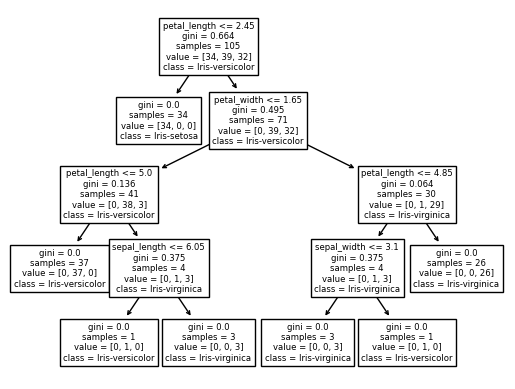

In [14]:
# menampilkan grafik decision tree
fig1 = plt.figure(1)
tree.plot_tree(clf,feature_names = X.columns, class_names = Y.columns)
fig1.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20240\1523864602.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


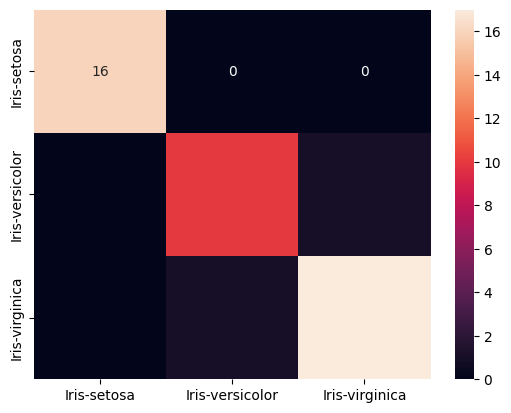

In [15]:
# menampilakn grafik confussion matrix
fig2= plt.figure(2)
sna = sns.heatmap(cm, annot=True, xticklabels=Y.columns, yticklabels=Y.columns)
fig2.show()

#### 2. Analisa hasilnya

### __Pembahasan__

dari hasil training model diatas, prediksi nya adalah jenis species dari bunga iris yaitu apakah itu termasuk Iris-setosa, Iris-versicolor, atau Iris-virginica dengan variabel independen yang terdiri dari  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']. 

akurasi model yang didaptkan yaitu sebesar 95.5% yang berarti memiliki tingkat akuraasi yang cukup tinggi dan dapat mengklasifikasikan data iris dengan baik

prediksi menggunakan 30% dari total 150 sampel yaitu sebanyak 45 sampel, yaitu
Iris-setosa: 16 sampel
Iris-versicolor: 11 sampel
Iris-virginica: 18 sampel
confussion matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. dari confussion matrix yang didapatkan yaitu 
[[16  0  0]

 [ 0 10  1]

 [ 0  1 17]]
 
 interpretasi confussion matrix = 
    - iris setosa -> semua dapat diprediksi dengan benar yaitu sebanyak 16 sampel
    - iris versicolor -> dari 11 sampel, model dapat memprediksi 10 benar dan 1 salah (harusnya iris versicolor tapi diprediksi sebagai iris virginica)
    - iris virginica -> dari 18 sampel, model dapat memprediksi 17 benar dan 1 salah(harisnya iris virginica tapi diprediksi sebagai iris versicolor)


diagram decision tree, menggunakan data training, 70% dari data total 150 sampel yaitu sebanyak 105 sampel: 

    - dengan root teratas. Jika panjang kelopak (petal_length) kurang dari atau sama dengan 2.45, maka data bergerak ke cabang kiri (True), jika tidak maka ke cabang kanan (False).
    - di cabang kiri(True) gini=0.0 berarti semuanya homogen dan didaptkan jumlah iris-setosa sebanyak 34

    - dicabang kanan(False). jika petal_width <= 1.65, maka data bergerak ke cabang kiri (True), jika tidak maka ke cabang kanan (False).
        - dicabang kiri(True) jika petal_length <= 5.0, maka data bergerak ke cabang kiri (True), jika tidak maka ke cabang kanan (False). 
            - dicabang kiri(True) didapatkan gini= 0.0 maka semua sudah sama. didaptkan iris versicolor sebanyak 37
            - dicabang kanan(False). jika sepal_length <= 6.05, maka data bergerak ke cabang kiri (True), jika tidak maka ke cabang kanan (False).
                - dicabang kiri(True) gini = 0.0, didapatkan iris versicolor sebanhyak 1
                - dicabang kanan(False) gini=0.0 didapatkan iris virginica sebanyak 1

    - dicabang kanan(False), jika petal_length <= 4.85, maka data bergerak ke cabang kiri (True), jika tidak maka ke cabang kanan (False).
        - dicabang kanan(True) gini=0.0, didapatkan iris virginica sebnayka 26
        - dicabang kiri(False), jika sepal_width <= 3.1, maka data bergerak ke cabang kiri (True), jika tidak maka ke cabang kanan (False).
            - dicabang kiri(True) gini=0.0, didapatkan iris virginica sebanyak 3 
            - dicabanh kanan(False) gini=0.0 didapatkan iris versicolor sebanyak 1
    
    total= 105
    iris setosa = 34
    iris versicolor = 39
    iris virginica = 32

diagram heatmap untuk visualisasi confussion matriks, semakin terang semakin banyak dan semakin gelap semakin sedikit angkanya, dengan garis Y adalah nilai aktual dan garis X adalah nilai prediksi 

akktual:
iris setosa = 16
iris versicolor = 11
iris viginica = 18

prediksi:
iris setosa = 16
iris versicolor = 11    prediksi salah 1, 1 prediksi iris virginica
iris virginica = 18     prediksi salah 1, 1 prediksi iris versicolor


